In [6]:
#!/usr/bin/env python
"""
Tutorial to demonstrate running parameter estimation on a reduced parameter
space for an injected eccentric binary black hole signal with masses & distnace
similar to GW150914.

This uses the same binary parameters that were used to make Figures 1, 2 & 5 in
Lower et al. (2018) -> arXiv:1806.05350.

For a more comprehensive look at what goes on in each step, refer to the
"basic_tutorial.py" example.
"""
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import bilby

%matplotlib inline

In [2]:
duration = 64.
sampling_frequency = 256.

outdir = 'outdir'
label = 'eccentric_GW140914'
bilby.core.utils.setup_logger(outdir=outdir, label=label)

# Set up a random seed for result reproducibility.
np.random.seed(150914)

injection_parameters = dict(
    mass_1=35., mass_2=30., eccentricity=0.1, luminosity_distance=440.,
    theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=45, dec=5.73)

waveform_arguments = dict(waveform_approximant='EccentricFD',
                          reference_frequency=10., minimum_frequency=10.)

# Create the waveform_generator using the LAL eccentric black hole no spins
# source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments)


# Setting up three interferometers (LIGO-Hanford (H1), LIGO-Livingston (L1), and
# Virgo (V1)) at their design sensitivities. The maximum frequency is set just
# prior to the point at which the waveform model terminates. This is to avoid
# any biases introduced from using a sharply terminating waveform model.
minimum_frequency = 10.
maximum_frequency = 128.


23:14 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_binary_black_hole_no_spins
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [4]:
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)


23:16 bilby INFO    : Injected signal in H1:
23:16 bilby INFO    :   optimal SNR = 66.39
23:16 bilby INFO    :   matched filter SNR = 66.72+1.40j
23:16 bilby INFO    :   mass_1 = 35.0
23:16 bilby INFO    :   mass_2 = 30.0
23:16 bilby INFO    :   eccentricity = 0.1
23:16 bilby INFO    :   luminosity_distance = 440.0
23:16 bilby INFO    :   theta_jn = 0.4
23:16 bilby INFO    :   psi = 0.1
23:16 bilby INFO    :   phase = 1.2
23:16 bilby INFO    :   geocent_time = 1180002601.0
23:16 bilby INFO    :   ra = 45
23:16 bilby INFO    :   dec = 5.73
23:16 bilby INFO    : Injected signal in L1:
23:16 bilby INFO    :   optimal SNR = 39.04
23:16 bilby INFO    :   matched filter SNR = 39.83-1.44j
23:16 bilby INFO    :   mass_1 = 35.0
23:16 bilby INFO    :   mass_2 = 30.0
23:16 bilby INFO    :   eccentricity = 0.1
23:16 bilby INFO    :   luminosity_distance = 440.0
23:16 bilby INFO    :   theta_jn = 0.4
23:16 bilby INFO    :   psi = 0.1
23:16 bilby INFO    :   phase = 1.2
23:16 bilby INFO    :   geoce

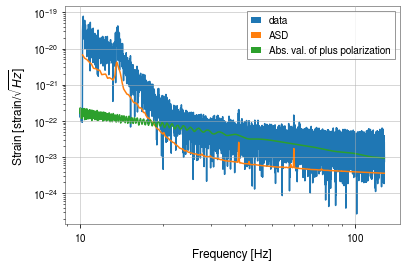

In [8]:
H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization")

'''L1 = ifos[1]
L1_injection = injection[1]

ax.loglog(L1.frequency_array[idxs]+5,
          L1.amplitude_spectral_density_array[idxs],
          label="ASD")'''


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()